###### Copyright (C) 2021 BITJUNGLE Rune Mathisen <rune@bitjungle.org>
###### Denne koden har en [GPLv3 lisens](http://www.gnu.org/licenses/gpl-3.0.html).

# Fall med luftmotstand: modellering, simulering og forsøk

**Dette er et undervisningsopplegg for elever som tar faget [Programmering og modellering X](https://www.udir.no/lk20/prm01-02) på videregående skole.**

## Forutsetninger

Før arbeidet med dette prosjektet starter bør elevene å fått en grunndig innføring i hva differensiallikninger er, og hvordan disse kan brukes. De bør også kunne bruke Eulers metode for å finne numeriske løsninger til ordinære differensialligninger.

## Tidsbruk

Arbeidet med dette prosjektet bør gå over minst 4 uker. Elevene skal selv utvikle modellen som brukes, med minst mulig hjelp fra læreren. Så skal de programmere en simulering, og bruke denne simuleringen når de designer forsøket. Så skal det gjennomføres forsøk, og til slutt skal data fra forsøket sammenliknes med simuleringer. Elevene bør få god tid til å jobbe grundig med alt dette.


---

# Oppgavetekst til elevene

**Hvordan oppfører et objekt seg når det faller? Denne oppgava krever en del arbeid. Du må lage en matematisk modell for et objekt i fall med luftmotstand, og så skal du bruke denne modellen til å gjøre datasimuleringer. Til slutt skal du gjennomføre forsøk for å verifisere modellen din.**

## Modellering

Lag en matematisk modell som får med seg kreftene $F$ som virker på objektet i to retninger, rett opp og rett ned. Det er tyngdekraften $G$ og luftmotstanden $L$. De to kreftene er motsatt retta. Summen av de to kreftene blir da $F=G-L$. Se [denne gode videoen](https://www.youtube.com/watch?v=Oy-4mPro3w8) for å sette deg grundig inn i problemstillinga. For $L$ kan du bruke [denne likninga for luftmotstand](https://en.wikipedia.org/wiki/Drag_equation). Sett opp modellen som en differensiallikning $\frac{dv}{dt}$. 

## Simulering

Bruk [Eulers metode](https://github.com/fagstoff/ProgMod/blob/master/Fagstoff/euler.ipynb) for å løse differensiallikninga du har laget. Nå er oppgava å finne ut om det er mulig å gjennomføre et forsøk hvor et objekt når [terminalfarten](https://no.wikipedia.org/wiki/Terminalfart). 

Du kan starte med å finne et egnet sted for å gjennomføre et forsøk med fall. Det bør helst være så høyt som mulig, men samtidig må det gå an å gjennomføre forsøket på en helt trygg måte. Det må ikke være fare for at noen personer faller utfor, og det må ikke være noen fare for at personer eller gjenstander kan bli truffet og skadet av det fallende objektet.

Når du har funnet et passende sted og anslått fallhøyda, skal du bruke modellen til å kjøre simuleringer med objekter som har varierende masse, form og [areal](https://en.wikipedia.org/wiki/Drag_coefficient). Går det an å utforme et objekt som vil oppnå terminalfart i den fallhøyda du har tilgjengelig?

## Forsøk

Nå har du gjennomført simuleringer for å designe et objekt som kommer så nær opptil terminalfart som mulig innenfor den fallhøyda du har tilgjengelig. Lag objektet, og bygg inn sensorer som kan brukes for å måle hastighet eller akselerasjon gjennom hele fallet. En mulighet er å bruke [to micro:bits som du kobler sammen slik at du får logget akselerasjonen](https://microbit.org/projects/make-it-code-it/python-wireless-data-logger/?editor=python) gjennom hele fallet.

Analyser dataene du samler inn, og sjekk hvor godt det stemmer overens med simuleringene. Dersom det er store avvik må du forsøke å finne ut hvor den største feilkilden er. Om det bare er mindre avvik kan du vurdere om du skal justere [drag-koeffisienten](https://en.wikipedia.org/wiki/Drag_coefficient).

---

# Løsningsforslag

## Modell for fall med luftmotstand.

Tar utgangspunkt i Newtons andre lov:

$$ \sum F = m \cdot a $$

Summen av kreftene er her gravitasjonskrafta minus drag-krafta. Vi antar at det ikke virker noen andre krefter på objektet, og at $F_G$ og $F_D$ er motsatt retta:

$$ \sum F = F_G - F_D $$

Gravitasjonskrafta $F_G$ er gitt ved:

$$ F_G = m \cdot g$$

Drag-krafta $F_D$ kan uttrykkes ved drag-likningen:

$$ F_D = \frac{1}{2} \cdot c_d  \cdot \rho  \cdot A \cdot v^2 $$

Vi kan nå sette opp:

$$ 
\sum F = F_G - F_D 
$$
$$
m  \cdot \sum a = m \cdot g - \frac{1}{2} \cdot c_d  \cdot \rho  \cdot A \cdot v^2 
$$

Dividerer med $m$ på begge sider:

$$
\sum a = g - \frac{1}{2m} \cdot c_d  \cdot \rho  \cdot A \cdot v^2 
$$

For å forenkle problemstillinga antar vi at objektet vårt ikke roterer, og at det bare akselererer i en retning (mot bakken). Vi vet at akselerasjonen $a$ kan skrives som:

$$ a = \frac{dv}{dt} $$

Setter dette inn i modellen vår og får differensiallikningen:

$$
\frac{dv}{dt} = g - \frac{1}{2m} \cdot c_d  \cdot \rho  \cdot A \cdot v^2 \\
$$


## Implementering i Python

Ut fra det overstående kan vi nå implementere modellen i Python. Setter først opp en del konstanter. Disse kan endres for å simulere ulike objekter som faller fra ulike høyder.

In [1]:
# --- Konstanter
g = 9.81    # m/s^2 - tyngdeakselerasjonen
m = 0.047   # kg    - massen til objektet som faller
cd = 1.05   # kg/m  - objektets drag-koeffisient (kube)
v0 = 0.0    # m/s   - objektets startfart
dt = 0.01   # s     - tidsintervall for beregninger (tidsskritt)
h0 = 30.0   # m     - fallhøyde
A = 0.0064  # m^2   - objektets areal i fallretning
rho = 1.2   # kg/m³ - tetthet til luft

Når vi skal løse differensiallikninger er vi avhengig av å ha startverdier. Vi skal lagre alle beregnede verdier for fallet i lister, og legger startverdier inn som første verdi i listene.

In [2]:
# --- Lister med startverdier
v = [v0]  # fart
h = [h0]  # høyde
t = [0]   # tid
a = [g]   # akselerasjon

Så må vi definere funsjonen som inneholder differensiallikningen, og en funksjon som regner ut objektets høyde over bakken.

In [3]:
def speed(v):
    '''Bruker Eulers metode for å estimere ny fart'''
    return v + (g - (1/(2*m)*cd * rho * A * v**2)) * dt

def height(h, v):
    '''Beregner ny høyde ut fra forrige høyde, fart og tidsskritt'''
    return h - v*dt 

Vi leter etter tidspunktet hvor fartsendring er nær 0, altså det punktet hvor objektet har nådd maksimal hastighet i retning nedover mot bakken. Lager en boolsk variabel som holder styr på om vi fortsatt leter, eller om vi har funnet denne hastigheten.

In [4]:
searching = True # Vi leter etter fartsending nær 0
threshold = 1E-3 # Når fartsendringa er så liten, så stopper vi

Nå kjører vi beregninger helt fram til vi treffer bakken.

In [5]:
while h[-1] > 0: # Kjør beregninger fram til vi treffer bakken
    v.append(speed(v[-1]))
    h.append(height(h[-1], v[-1]))
    t.append(t[-1] + dt)
    a.append((-1)*(v[-2] - v[-1])/dt) 
    if searching and abs(v[-2] - v[-1]) < threshold:
        # Fartsendring er nær 0
        print('Konstant fart ved t =', round(t[-1], 1), 'og h =', round(h[-1], 1))
        searching = False

Konstant fart ved t = 3.2 og h = 3.3


La oss plotte resultatet, og se hvordan det ser ut.

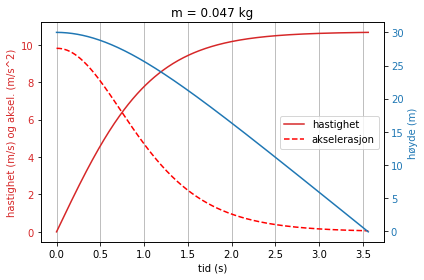

In [6]:
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('tid (s)')
ax1.set_ylabel('hastighet (m/s) og aksel. (m/s^2)', color=color)
ax1.plot(t, v, color=color, label="hastighet")
ax1.plot(t, a, 'r--', label="akselerasjon")
plt.legend()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()# to y-akser med felles x-akse

color = 'tab:blue'
ax2.set_ylabel('høyde (m)', color=color)
ax2.plot(t, h, color=color, label="høyde")
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(axis='x')
plt.title('m = {} kg'.format(m))
fig.tight_layout()
plt.show()

In [7]:
print('Sluttfart: ', round(v[-1], 1))
print('Start- og sluttakselerasjon: ', a[0], round(a[-1], 2))


Sluttfart:  10.7
Start- og sluttakselerasjon:  9.81 0.06


---

# Pilotforsøk

Det ble gjennomført et pilotforsøk for å se om prosjektet var praktisk gjennomførbart. En micro:bit ble pakket inn i Styrofoam, og sluppet fra en høyde på ca. 7-8 meter. Høyda var alt for lav til at objektet nådde terminalfart, men akselerometerdata fra micro:bit-en stemte godt overens med simulerte data i starten av fallet.

Elevene gjennomførte senere en rekke fallforsøk fra større høyder og med objekter som hadde en annen drag-koeffisient enn det som ble brukt i pilotforsøket. Elevforsøkene stemte godt overens med simuleringene.

Nedenfor er det vist noen bilder fra pilotforsøket.

![Bilde av micro:bits](fall_bilder/IMG_0392.jpeg "Micro:bits som ble brukt i forsøket")

![Bilde av micro:bit i Styrofoam](fall_bilder/IMG_0394.jpeg "Micro:bit pakket inn i Styrofoam slippes")

![Bilde av forsøksted](fall_bilder/IMG_0396.jpeg "Micro:biten ble sluppet her")

